In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

import numpy as np

import sys as sys
sys.path.append('..')

from bayes.regression.linearparametric import BayesLinear as Model
from bayes.regression.linearparametric.bases import gaussianType as phi

### The Gaussian Basis Function

<IPython.core.display.Javascript object>


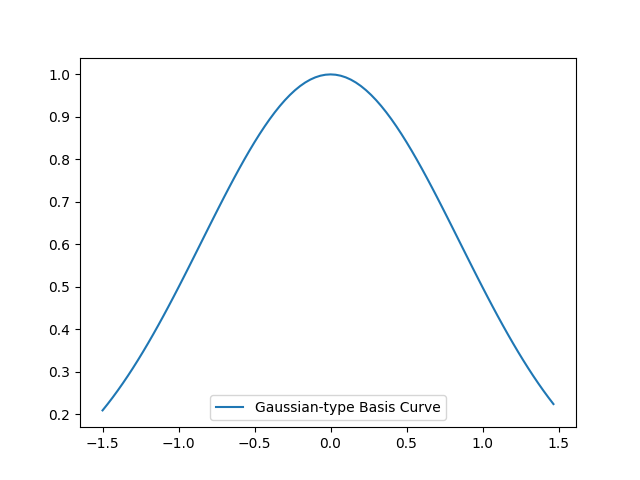

In [5]:
phiV = 1.2
xGB = np.arange(90.)/30. - 1.5
plt.plot(xGB, phi(np.expand_dims(xGB, axis=1), 0, phiV), label='Gaussian-type Basis Curve')
plt.legend()

## The Test Data

<IPython.core.display.Javascript object>


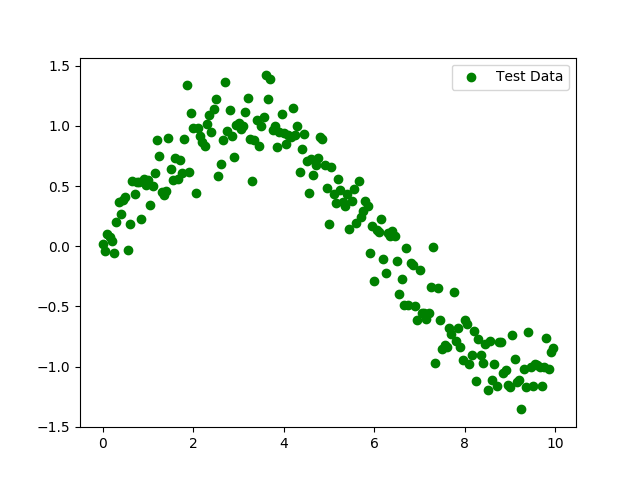

In [6]:
noiseStdDev = 0.2
pointRange = (0.,10.)
numPoints = 200.
def testFunc(x):
    return np.sin(x/2)

x = np.arange(pointRange[0], pointRange[1], (pointRange[1]-pointRange[0])/numPoints)
t = testFunc(x) + np.random.normal(0, noiseStdDev, size=x.size)
plt.scatter(x, t, label='Test Data', c='g')
plt.legend()

## The Fit!

In [7]:
fit = Model(phi, [{'u':np.array([i]), 'v':np.array(phiV)} \
                      for i in list(np.arange(pointRange[0],pointRange[1]+phiV,phiV))], noiseStdDev=noiseStdDev,
                       priorStdDev=0.1, priorMean=0.)

### Train

In [8]:
fit.train(np.expand_dims(x, axis=1),t)

<IPython.core.display.Javascript object>


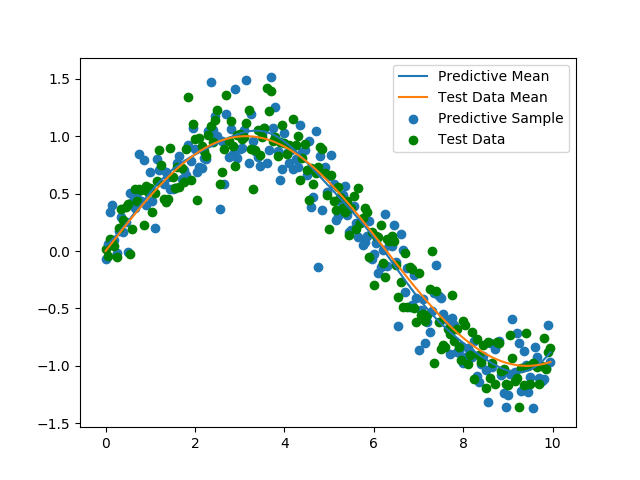

In [9]:
predictiveMean = plt.plot(x, fit.predictive(np.expand_dims(x, axis=1))[0], label='Predictive Mean')
testMean = plt.plot(x, testFunc(x), label='Test Data Mean')
predictiveSampling = plt.scatter(x, fit.sample(np.expand_dims(x, axis=1)), label='Predictive Sample')
plt.scatter(x, t, label='Test Data', c='g')
plt.legend()

#### \#TODO
1. Look into the chronic underestimation of extrema.
2. Create animation demonstrating sequential training.